In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

In [53]:
# product table 가져오기
base_path = os.getcwd()
product = pd.read_csv(base_path + '/product_final.csv', skiprows = [6043, 6568, 7398, 7938, 9025, 10263, 10426, 10904, 11372, 11944, 14111, 14531, 15075, 29905, 31624, 33019, 35747, 35961, 37769, 38104, 38274, 38403])
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44402 entries, 0 to 44401
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  44402 non-null  int64 
 1   gender              44402 non-null  object
 2   masterCategory      44402 non-null  object
 3   subCategory         44402 non-null  object
 4   articleType         44402 non-null  object
 5   baseColour          44387 non-null  object
 6   season              44381 non-null  object
 7   usage               44085 non-null  object
 8   productDisplayName  44395 non-null  object
 9   brand               44395 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.4+ MB


In [54]:
# click_stream_new table
click_stream_new = pd.read_csv(base_path + '/click_stream_final.csv')
click_stream_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 11 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   traffic_source   object 
 4   product_id       float64
 5   quantity         int64  
 6   item_price       int64  
 7   payment_status   float64
 8   search_keywords  object 
 9   promo_code       float64
 10  promo_amount     int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.1+ GB


In [55]:
# customer table
customer = pd.read_csv(base_path + '/customer_final.csv')
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      100000 non-null  int64 
 1   gender           100000 non-null  object
 2   birthdate        100000 non-null  object
 3   home_location    100000 non-null  object
 4   first_join_date  100000 non-null  object
 5   age_join         100000 non-null  int64 
 6   age_now          100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [56]:
# transaction_new
transaction_new = pd.read_csv(base_path + '/transaction_final.csv')
transaction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   created_at      1254585 non-null  object 
 1   customer_id     1254585 non-null  int64  
 2   booking_id      1254585 non-null  object 
 3   session_id      1254585 non-null  object 
 4   payment_method  1254585 non-null  object 
 5   payment_status  1254585 non-null  int64  
 6   promo_amount    1254585 non-null  int64  
 7   promo_code      1254585 non-null  float64
 8   shipment_fee    1254585 non-null  int64  
 9   total_amount    1254585 non-null  int64  
 10  product_id      1254585 non-null  int64  
 11  quantity        1254585 non-null  int64  
 12  item_price      1254585 non-null  int64  
 13  with_promo      1254585 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 134.0+ MB


# 1. 브랜드 관련 EDA

In [57]:
product.brand.value_counts()

nike        2288
puma        2092
adidas      2079
united      1401
fabindia     750
            ... 
ayaanay        1
swayam         1
levi'si        1
megadeth       1
deniyo         1
Name: brand, Length: 443, dtype: int64

#### 2021년 인도네시아 18세 ~ 55세 설문조사 결과를 토대로 인기있는 상위 10개 브랜드가 이커머스에 입점되어 있는지 확인 

In [58]:
# 이커머스 회사의 고객 타겟층인 18세에서 35세와 다소 차이가 있을 수 있으나, 참고 목적으로 살펴볼 예정
    # 출처 : https://welcon.kocca.kr/cmm/fms/CrawlingFileDown.do?atchFileId=FILE_f016d5ef-6951-4e09-9cf0-8f513a360671&fileSn=1
brand = product.brand.dropna()
for famous_brand in ['adidas', 'h&m', 'converse', 'uniqlo', 'nike', 'eiger', '3second', 'nevada', 'vans', 'cardinal']:
    print(f'{famous_brand} :', len(brand[brand.str.contains(famous_brand)]))

adidas : 2079
h&m : 0
converse : 169
uniqlo : 0
nike : 2288
eiger : 0
3second : 0
nevada : 0
vans : 196
cardinal : 0


In [59]:
# 문제점 : 인도네시아에서 인기있는 브랜드인 adidas, nike를 제외하고 입점이 안되어있거나 제품 수가 매우 적음

# 2. 검색어 관련 EDA (추후 진행)

In [60]:
# 검색 키워드 유니크 값
click_stream_new.search_keywords.unique()

array([nan, 'Dress', "Woman's Bag", 'Trousers', 'Shirts', 'Shoes',
       'Work Bag', 'T-Shirt', 'Hat', 'Second Hand', 'Nike Shoes',
       'Adidas Shoes', 'Time', 'Sandal', 'House dress', 'Pajamas'],
      dtype=object)

In [61]:
# 검색 키워드가 NaN 값이 아닌 데이터: 1173266
len(click_stream_new) - click_stream_new.search_keywords.isnull().sum()

1173266

In [62]:
# SEARCH라는 이벤트가 있을때만 검색 키워드 존재
click_stream_new.groupby(['search_keywords', 'event_name']).count()

,,session_id,event_time,traffic_source,product_id,quantity,item_price,payment_status,promo_code,promo_amount
search_keywords,event_name,,,,,,,,,
Adidas Shoes,SEARCH,25627,25627,25627,0,25627,25627,0,25627,25627
Dress,SEARCH,333023,333023,333023,0,333023,333023,0,333023,333023
Hat,SEARCH,4844,4844,4844,0,4844,4844,0,4844,4844
House dress,SEARCH,1197,1197,1197,0,1197,1197,0,1197,1197
Nike Shoes,SEARCH,51578,51578,51578,0,51578,51578,0,51578,51578
Pajamas,SEARCH,2268,2268,2268,0,2268,2268,0,2268,2268
Sandal,SEARCH,12787,12787,12787,0,12787,12787,0,12787,12787
Second Hand,SEARCH,224882,224882,224882,0,224882,224882,0,224882,224882
Shirts,SEARCH,167632,167632,167632,0,167632,167632,0,167632,167632


In [63]:
click_stream_new.columns

Index(['session_id', 'event_name', 'event_time', 'traffic_source',
       'product_id', 'quantity', 'item_price', 'payment_status',
       'search_keywords', 'promo_code', 'promo_amount'],
      dtype='object')

In [64]:
# 검색을 많이 한 순서대로 정렬
click_stream_new['search_keywords'].value_counts()

Dress           333023
Second Hand     224882
Shirts          167632
Woman's Bag     128790
T-Shirt         107184
Nike Shoes       51578
Trousers         39748
Work Bag         38677
Shoes            28029
Adidas Shoes     25627
Sandal           12787
Time              7000
Hat               4844
Pajamas           2268
House dress       1197
Name: search_keywords, dtype: int64

In [65]:
# 번역한 데이터를 바탕으로 키워드 순위 재구성 

# -> 1. 드레스에 대한 수요가 많음
# -> 2. 중고상품에 대한 수요가 많음
# -> 3. Nike, Adidas 신발 수요 많음
# -> 4. Time에 대한 검색 수요가 있음(..?)

In [66]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06 15:54:32.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06 16:03:57.821085+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01 12:05:10.322763+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01 12:06:33.322763+00:00,MOBILE,15315.0,4,313529,NaN,NaN,0.0,0
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01 12:15:29.425431+00:00,MOBILE,NaN,0,0,1.0,NaN,0.0,0


In [67]:
# 2016~2022년까지 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율
click_stream_new['event_time'] = pd.to_datetime(click_stream_new['event_time'])
click_stream_new['month'] = click_stream_new['event_time'].dt.to_period('M')
click_stream_new['month'] = click_stream_new['month'].astype('str')

# 매년 월별 전체검색 수, 중고 검색 수, 전체 검색 수 대비 중고 검색 비율 정보 데이터프레임
temp_click_stream_new = click_stream_new[click_stream_new['search_keywords'].notnull()].groupby('month')['session_id'].count()
temp_click_stream_new = pd.DataFrame(data=temp_click_stream_new).reset_index()

temp_secondhand = click_stream_new[click_stream_new['search_keywords'] == 'Second Hand'].groupby('month')['session_id'].count()
temp_secondhand = pd.DataFrame(data=temp_secondhand).reset_index()

temp_click_stream_new = pd.merge(temp_click_stream_new, temp_secondhand, how='inner', on='month')
temp_click_stream_new.columns = ['month', 'total_count', 'second_hand_count']

temp_click_stream_new['ratio_second_hand'] = round((temp_click_stream_new['second_hand_count'] / temp_click_stream_new['total_count']) * 100, 2)
temp_click_stream_new.head()

/var/folders/72/sf0gd2_15c7bv2klzkjcqt580000gn/T/ipykernel_62889/846743445.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  click_stream_new['month'] = click_stream_new['event_time'].dt.to_period('M')


,month,total_count,second_hand_count,ratio_second_hand
0,2016-07,341,60,17.60
1,2016-08,700,116,16.57
2,2016-09,985,191,19.39
3,2016-10,1269,258,20.33
4,2016-11,1562,300,19.21


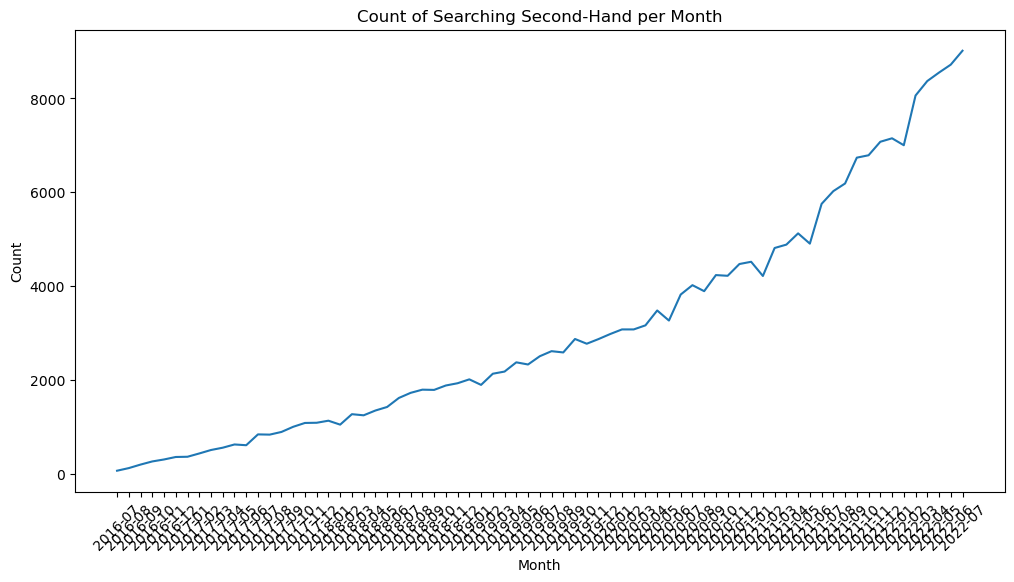

In [68]:
# 월별로 중고 검색 횟수 모아보기
plt.figure(figsize=(12, 6))
ax = sns.lineplot(temp_click_stream_new, x='month', y='second_hand_count')
# ax2 = ax.twinx()
# ax2 = sns.barplot(temp_click_stream_new, x='month', y='ratio_second_hand', ax=ax2)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Searching Second-Hand per Month')
plt.xticks(rotation=45)
plt.show()

##### 구매로 이어진(구매시도까지 이어진) 검색어 탐색

In [69]:
click_stream_new = click_stream_new.sort_values(by='event_time')

In [70]:
click_stream_new.payment_status.unique()

array([nan,  1.,  0.])

In [71]:
click_stream_new.head()

,session_id,event_name,event_time,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount,month
12371556,607d864b-76b5-45a1-a45d-7fb666a03ea1,HOMEPAGE,2016-06-30 22:59:36.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371559,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:01:06.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371557,607d864b-76b5-45a1-a45d-7fb666a03ea1,ADD_TO_CART,2016-06-30 23:01:14.254358+00:00,MOBILE,33314.0,3,210265,NaN,NaN,0.0,0,2016-06
12371560,607d864b-76b5-45a1-a45d-7fb666a03ea1,CLICK,2016-06-30 23:02:35.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06
12371561,607d864b-76b5-45a1-a45d-7fb666a03ea1,SCROLL,2016-06-30 23:03:56.254358+00:00,MOBILE,NaN,0,0,NaN,NaN,0.0,0,2016-06


In [72]:
# 추후 session 정보가 생기면 더 자세하게 진행
print(f'session_id 유니크값: {click_stream_new.session_id.nunique()}')

print(f"session_id 값들 중 검색을 한 session_id 수: {click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()}")

print(f"session_id 중 검색이 포함된 session_id 비율: {round(click_stream_new[click_stream_new.event_name == 'SEARCH']['session_id'].nunique()/click_stream_new.session_id.nunique() * 100, 2)}%")
num_search = len(click_stream_new[click_stream_new['event_name'] == 'SEARCH'])

print(f'검색 횟수: {num_search}')

session_id 유니크값: 895203
session_id 값들 중 검색을 한 session_id 수: 490846
session_id 중 검색이 포함된 session_id 비율: 54.83%
검색 횟수: 1173266


In [73]:
# T-Shirt -> Tshirts(articleType)
# Shoes, Adidas Shoes, Nike Shoes -> Shoes
# Woman's Bag, Work Bag -> Bags
# Dress -> Dress
# Sandal -> Sandas
# Shirts -> shirts
# Trousers -> trousers(articleType)
# Pajamas, House Dress -> Loungewear and Nightwear
# Hat -> Hat(articleType)

In [74]:
# click_trans_df = pd.merge(click_stream_new, transaction_df[['session_id', 'event_time', 'product_id']], how='left', on=['session_id', 'event_time'])
# x = click_trans_df.product_id_x
# y = click_trans_df.product_id_y
# z = x.fillna(0)+y.fillna(0)
# z = z.replace(0, np.nan)

# click_trans_df.product_id_x = z
# click_trans_df.rename(columns={'product_id_x':'product_id'}, inplace=True)
# click_trans_df.drop('product_id_y', axis=1, inplace=True)
# click_trans_df.head()

In [75]:
# cnt = 0

# temp = click_stream_new[click_stream_new.session_id == '98e66f53-f24f-4238-8c9c-34a0482e22d5'].reset_index(drop=True)
# search_idx = temp[temp['event_name'] == 'SEARCH'].index
# # search_dict = {idx:temp.loc[idx]['search_keywords'] for idx in search_idx}
# trans_idx = temp[(temp['event_name'] == 'ADD_TO_CART') | (temp['event_name'] == 'BOOKING')].index

# for i in search_idx:
#     filtered_idx = trans_idx[trans_idx > i]
#     filtered_ = [temp.iloc[i] for i in filtered_idx]
#     if temp.iloc[i] in filtered_:
#         cnt += 1


# 3. 회원가입 후 첫 구매까지의 기간 분석

### 결론 
1. 회원가입 후 구매까지 이어지는 비율 50.7% -> 회원가입을 했다는 것을 구매하고 싶은 상품이 있었다는 이야기지만 구매로 이어지지 않았다는게 문제(이유..?)
2. 회원가입한 사람 중 당일 구매한 사람 비율 : 46% -> 일반적으로 60%가 구매함(나래님 자료), 첫 구매 유도를 잘 하지 못한것이 문제
 

In [76]:
customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22


In [77]:
transaction_new = transaction_new.sort_values(by='created_at')
transaction_new.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,product_id,quantity,item_price,with_promo
1254461,2016-06-30 23:18:44.792905+00:00,74089,2dd76c45-6ddb-46b4-9c91-c59d4f9b76ba,607d864b-76b5-45a1-a45d-7fb666a03ea1,LinkAja,1,0,0.0,10000,640795,33314,3,210265,0
1201589,2016-07-01 02:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,1,6053,4.0,10000,578826,16061,1,163539,1
1201590,2016-07-01 02:53:26.720195+00:00,6183,b9724455-552e-4deb-9351-4a4fe4ee0b8f,c5d3792d-9220-47db-ad80-4932f3f88d0e,OVO,1,6053,4.0,10000,578826,7588,1,411340,1
1201721,2016-07-01 09:45:51.803842+00:00,16228,8035f5b3-2a7c-4e30-ab4a-9b3091edc37f,bbff775e-4166-46aa-bbfd-4ba6465add17,Debit Card,1,0,0.0,15000,333792,47650,1,318792,0
1254460,2016-07-01 22:32:45.218400+00:00,73773,5f390336-0a5f-4e0d-bfe1-df080269ce45,8f385c80-1b70-4861-80ac-5eb3b5620fee,Debit Card,1,0,0.0,10000,256670,32185,1,246670,0


In [80]:
first_transaction = transaction_new.groupby('customer_id')['created_at'].min()
first_transaction

customer_id
3        2018-08-25 18:54:03.844494+00:00
8        2021-02-13 09:47:39.656991+00:00
9        2021-06-27 01:51:48.421034+00:00
11       2022-03-07 14:29:13.759159+00:00
15       2019-09-30 04:47:36.105040+00:00
                       ...               
99992    2020-06-30 21:03:37.873510+00:00
99995    2020-08-19 09:50:48.810263+00:00
99997    2020-04-25 18:38:16.825127+00:00
99998    2018-07-02 20:56:19.703960+00:00
99999    2016-10-12 19:22:21.166237+00:00
Name: created_at, Length: 50705, dtype: object

In [129]:
merge_customer = pd.merge(customer, first_transaction, how='left', on='customer_id')
merge_customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,created_at
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,NaN
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,NaN
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-08-23 12:53:12.916342+00:00
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,NaN
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021-04-16 09:20:03.134253+00:00


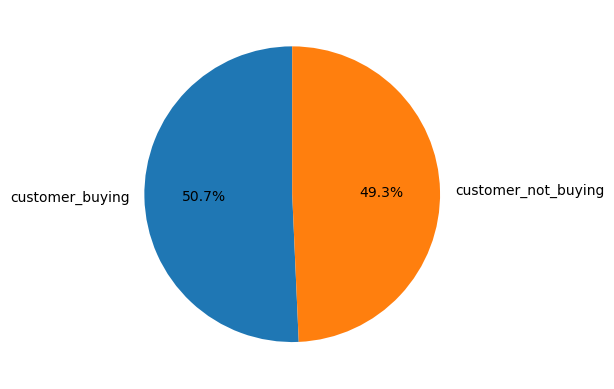

In [163]:
# 회원가입한 고객 중 구매경험이 있는 고객 비율
join_customer_buy_ratio = len(merge_customer[merge_customer.created_at.notnull()])/len(merge_customer)
labels = ['customer_buying', 'customer_not_buying']
plt.pie([join_customer_buy_ratio, 1-join_customer_buy_ratio], startangle=90, labels=labels, autopct='%.1f%%')
plt.show()


In [131]:
merge_customer.created_at = pd.to_datetime(merge_customer.created_at).dt.date
merge_customer.created_at = pd.to_datetime(merge_customer.created_at)
merge_customer.first_join_date = pd.to_datetime(merge_customer.first_join_date)
merge_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   customer_id      100000 non-null  int64         
 1   gender           100000 non-null  object        
 2   birthdate        100000 non-null  object        
 3   home_location    100000 non-null  object        
 4   first_join_date  100000 non-null  datetime64[ns]
 5   age_join         100000 non-null  int64         
 6   age_now          100000 non-null  int64         
 7   created_at       50705 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 6.9+ MB


In [132]:
merge_customer.head()

,customer_id,gender,birthdate,home_location,first_join_date,age_join,age_now,created_at
0,2870,F,1996-06-14,Sumatera Barat,2019-07-21,23,26,NaT
1,8193,F,1993-08-16,Jakarta Raya,2017-07-16,24,29,NaT
2,7279,M,1989-01-23,Nusa Tenggara Barat,2020-08-23,31,33,2020-08-23
3,88813,M,1991-01-05,Kalimantan Timur,2021-10-03,30,31,NaT
4,82542,M,2000-07-15,Kalimantan Selatan,2021-04-11,21,22,2021-04-16


In [143]:
# 회원가입 당일 구입한 비율 46.2%
period_buy_after_join = (merge_customer.created_at - merge_customer.first_join_date)
print(len(period_buy_after_join[period_buy_after_join == '0 days']) / period_buy_after_join.notnull().sum())


0.46222266048713145


In [146]:
# 회원가입 후 평균 1일 이내로 구매
period_buy_after_join[period_buy_after_join.notnull()].describe()

count                        50705
mean     1 days 00:43:54.343753081
std      1 days 11:17:17.317556473
min                0 days 00:00:00
25%                0 days 00:00:00
50%                1 days 00:00:00
75%                1 days 00:00:00
max               15 days 00:00:00
dtype: object

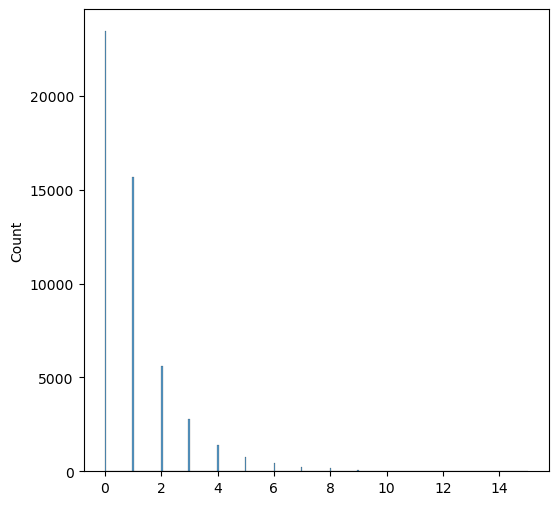

In [162]:
# 분포를 확인했을 때 대부분 회원가입 후 1일 이내 구매
plt.figure(figsize=(6,6))
sns.histplot(period_buy_after_join[period_buy_after_join.notnull()].dt.days)
plt.show()